In [4]:
import tensorflow as tf

# Load the TFLite model
tflite_model_path = "/content/drive/MyDrive/CodeForGood/lite-model_yolo-v5-tflite_tflite_model_1.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

# Allocate memory for the model
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [3]:
import tensorflow as tf

tflite_model_path = "/content/drive/MyDrive/CodeForGood/lite-model_yolo-v5-tflite_tflite_model_1.tflite"

try:
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    print("TFLite model loaded successfully.")
except Exception as e:
    print(f"Error loading TFLite model: {str(e)}")


TFLite model loaded successfully.


In [40]:
output_details

[{'name': 'Identity',
  'index': 422,
  'shape': array([   1, 6300,   85], dtype=int32),
  'shape_signature': array([   1, 6300,   85], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [5]:
input_details

[{'name': 'input_1',
  'index': 0,
  'shape': array([  1, 320, 320,   3], dtype=int32),
  'shape_signature': array([  1, 320, 320,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [13]:
!unzip "/content/drive/MyDrive/CodeForGood/DataSet/archive.zip" -d "/content/drive/MyDrive/CodeForGood/DataSet/"

Archive:  /content/drive/MyDrive/CodeForGood/DataSet/archive.zip
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/1.jpg  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/1.txt  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/10.jpg  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/10.txt  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/100.jpg  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/100.txt  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/101.jpg  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/101.txt  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/102.jpg  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/102.txt  
  inflating: /content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/103.jpg  
  inflating: /con

In [12]:
import os
os.listdir("/content/drive/MyDrive/CodeForGood/")

['lite-model_yolo-v5-tflite_tflite_model_1.tflite',
 '.ipynb_checkpoints',
 'DataSet',
 'archive.zip']

In [24]:
file_paths_splitext = [os.path.splitext(path) for path in os.listdir("/content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/")]

In [ ]:
os.listdir("/content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/")

In [35]:
image_paths = []
for file in file_paths_splitext:
  if(file[1]==".jpg"):
    image_paths.append("/content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/" + file[0] + ".jpg" )

In [ ]:
image_paths

In [31]:
from PIL import Image

image = Image.open(image_paths[0])


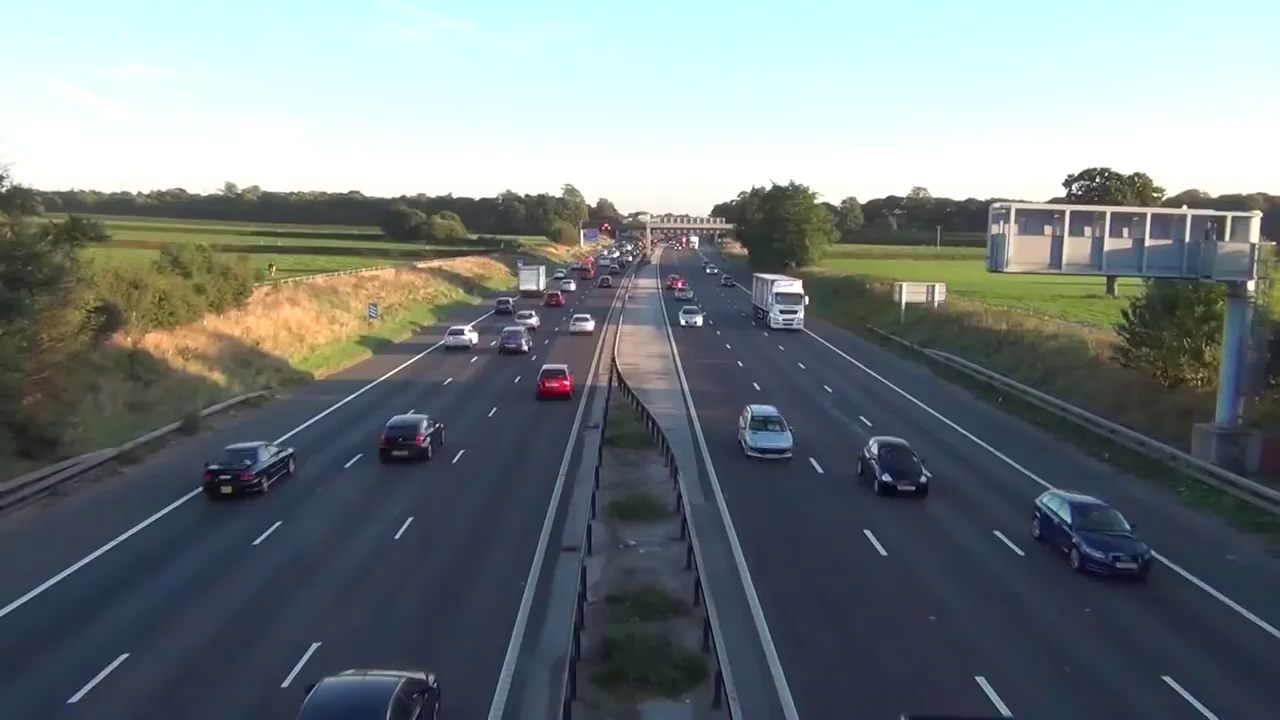

In [32]:
image

In [37]:
labels_paths = []
for file in file_paths_splitext:
  if(file[1]==".txt"):
    labels_paths.append("/content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/" + file[0] + ".txt" )

In [39]:
labels_paths[22]

'/content/drive/MyDrive/CodeForGood/DataSet/Vehicle Detection/119.txt'

In [41]:
len(image_paths)

1262

In [42]:
import cv2
import numpy as np

def preprocess_image(image_path, input_shape):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to the specified input shape
    image = cv2.resize(image, input_shape)

    # Convert BGR image to RGB (if needed)
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to the range [0, 1]
    image = image.astype(np.float32) / 255.0

    # Expand dimensions to create a batch of one image
    image = np.expand_dims(image, axis=0)

    return image

# Example usage:
image_path = image_paths[0]
input_shape = (320, 320)  # Adjust this to match your YOLO model's input size
preprocessed_image = preprocess_image(image_path, input_shape)


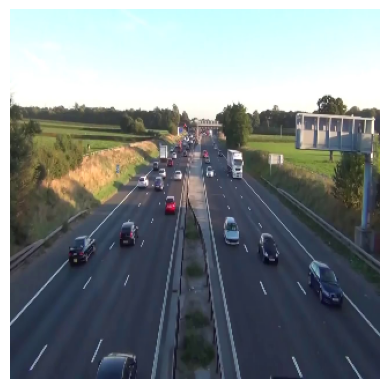

In [47]:
import matplotlib.pyplot as plt

plt.imshow(preprocessed_image[0])
plt.axis("off")
plt.show()